In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
  
# 1 locus, 5 alleles: 0,1,2,3,4
# allele 0,1,2 have phenotype A
# allele 3 has phenotype V (intermediate)
# allele 4 has phenotype B
def w_A(i,j):

    if (i<3) and (j<3):
        return (1+s)*(1+s)
    elif (i<3) and (j==3):
        return (1+s)*(1+k_int*s)
    elif (i<3) and (j==4):
        return (1+s)
    elif (i==3) and (j<3):
        return (1+k_int*s)*(1+s)
    elif (i==3) and (j==3):
        return (1+k_int*s)*(1+k_int*s)
    elif (i==3) and (j==4):
        return (1+k_int*s)
    elif (i==4) and (j<3):
        return (1+s)
    elif (i==4) and (j==3):
        return (1+k_int*s)
    elif (i==4) and (j==4):
        return 1

def w_B(i,j ):
    if (i<3) and (j<3):
        return 1
    elif (i<3) and (j==3):
        return (1+k_int*s)
    elif (i<3) and (j==4):
        return (1+s)
    elif (i==3) and (j<3):
        return (1+k_int*s)
    elif (i==3) and (j==3):
        return (1+k_int*s)*(1+k_int*s)
    elif (i==3) and (j==4):
        return (1+k_int*s)*(1+s)
    elif (i==4) and (j<3):
        return (1+s)
    elif (i==4) and (j==3):
        return (1+s)*(1+k_int*s)
    elif (i==4) and (j==4):
        return (1+s)*(1+s)

def w(i,j, is_E_A):
    if is_E_A:
        return w_A(i,j)
    else:
        return w_B(i,j)
#main
s = 1 # fitness advantage of A in E_A (or B in E_B)
k_int = 0.5 # 0<=k_int<=1,intermediacy of the V phenotype
mu = 0.01 # mutation rate
num_allele_per_locus = 5
#each generation, allele i can mutate to (i-1 or i+1) mod 5, each with mu/2 chance
lam = 10

population = [[0.04,0.04,0.04,0.04,0.04],
              [0.04,0.04,0.04,0.04,0.04],
              [0.04,0.04,0.04,0.04,0.04],
              [0.04,0.04,0.04,0.04,0.04],
              [0.04,0.04,0.04,0.04,0.04]] # initial frequencies for the 25 genotypes

assert(len(population) == num_allele_per_locus)
gen_i = 0 # counter for generation
is_E_A = True # whether it's currently in E_A env
delta = 10 # check if there is change between gens, detect equilibrium

# lists for plots
gen_c = [0]
p_record=[[[0.04],[0.04],[0.04],[0.04],[0.04]],
          [[0.04],[0.04],[0.04],[0.04],[0.04]],
          [[0.04],[0.04],[0.04],[0.04],[0.04]],
          [[0.04],[0.04],[0.04],[0.04],[0.04]],
          [[0.04],[0.04],[0.04],[0.04],[0.04]]]

# To store the allelic freq of gi at a certain generation for plotting allelic distrbution over gen
G_alleles_freq_over_gen=[[],[],[],[],[]]
H_alleles_freq_over_gen=[[],[],[],[],[]]

while delta>0.0001:
    gen_i += 1
    
    #fluctuate between E_A and E_B every lam gen
    # alternate env if necessary
    #if (gen_i % lam == 0):
    #    is_E_A = not is_E_A
    
    delta = 0
    # calculate new freq
    new_population = np.zeros((5,5))
    avg_fit = 0
    for g in range(num_allele_per_locus):
      for h in range(num_allele_per_locus):
        avg_fit += population[g][h]*w(g,h, is_E_A)

    for a in range(num_allele_per_locus):
      for b in range(num_allele_per_locus):

        # updating genotype frequencies according to difference equations
        j_A = (a-1) % num_allele_per_locus
        k_A = (a+1) % num_allele_per_locus
        g_A_b = population[a][b] * w(a,b,is_E_A)*(1-mu) 
        g_A_b += mu*0.5*population[j_A][b] * w(j_A,b,is_E_A)
        g_A_b += mu*0.5*population[k_A][b] * w(k_A,b,is_E_A)
        g_A_b = g_A_b/avg_fit
        new_population[a][b] = g_A_b
        p_record[a][b].append(g_A_b)
        delta += abs(g_A_b-population[a][b])

    # updating the population matrix
    population = new_population
    # save gen counter
    gen_c.append(gen_i)

    
    

    # selecting a gi whose allelic frequency over gen needs to be obtained
    for gs in range(len(p_record)):
      gth_allele_freq_over_gen=[]
      for gen in range(len(p_record[0][0])):
        g_allelic_freq_1_gen=0
    # selecting which generation's gi frequency is required
        for g_hi in range(len(p_record[0])):
          # computing the allelic frequency from genotype frequency
          g_allelic_freq_1_gen+=p_record[gs][g_hi][gen]
      # saving the allelic frequency of gi at selected generation
      gth_allele_freq_over_gen.append(g_allelic_freq_1_gen)
    # saving the allelic frequency of gi for all generation
      G_alleles_freq_over_gen[gs].append(gth_allele_freq_over_gen)

    p_record2_np=np.asarray(p_record)
    # selecting a hi whose allelic frequency over gen needs to be obtained
    for hs in range(len(p_record[0])):
      hth_allele_freq_over_gen=[]
      for gen in range(len(p_record[0][0])):
        h_allelic_freq_1_gen=0
    # selecting which generation's hi frequency is required
        for h_gi in range(len(p_record)):
          # computing the allelic frequency from genotype frequency
          h_allelic_freq_1_gen+=p_record[h_gi][hs][gen]
      # saving the allelic frequency of hi at selected generation
      hth_allele_freq_over_gen.append(h_allelic_freq_1_gen)
    # saving the allelic frequency of gi for all generation
      H_alleles_freq_over_gen[hs].append(hth_allele_freq_over_gen)






In [ ]:
print(len(G_alleles_freq_over_gen))
print(len(H_alleles_freq_over_gen))

5
5


In [ ]:
G_alleles_freq_over_gen_np=np.asarray(G_alleles_freq_over_gen)

In [ ]:
G_alleles_freq_over_gen_np[:,1]

array([[0.26079301],
       [0.26241922],
       [0.26152534],
       [0.14777842],
       [0.06748401]])

In [ ]:
print(len(G_alleles_freq_over_gen[1]))
print(len(H_alleles_freq_over_gen[1]))

224
224


In [ ]:
len(gen_c)

225

[[9.70990572e-02 9.70990572e-02 9.70990572e-02 1.00216219e-29
  3.60160420e-69]
 [1.35441464e-01 1.35441464e-01 1.35441464e-01 1.39789528e-29
  5.02380310e-69]
 [9.78785480e-02 9.78785480e-02 9.78785480e-02 1.01020734e-29
  3.63051712e-69]
 [1.93269832e-03 1.93269832e-03 1.93269832e-03 1.99474355e-31
  7.16877651e-71]
 [9.81566128e-04 9.81566128e-04 9.81566128e-04 1.01307725e-31
  3.64083112e-71]]


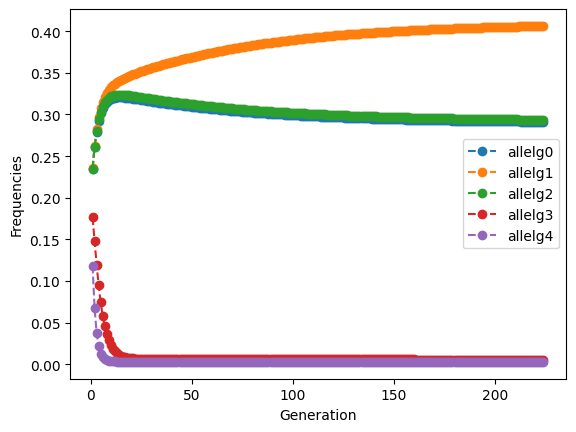

In [ ]:
print(population) #final pop
plt.plot(gen_c[1:],G_alleles_freq_over_gen[0], marker='o', linestyle='dashed',label = 'allelg0')
plt.plot(gen_c[1:],G_alleles_freq_over_gen[1], marker='o', linestyle='dashed',label = 'allelg1')
plt.plot(gen_c[1:],G_alleles_freq_over_gen[2], marker='o', linestyle='dashed',label = 'allelg2')
plt.plot(gen_c[1:],G_alleles_freq_over_gen[3], marker='o', linestyle='dashed',label = 'allelg3')
plt.plot(gen_c[1:],G_alleles_freq_over_gen[4], marker='o', linestyle='dashed',label = 'allelg4')

# naming the x axis
plt.xlabel('Generation')
# naming the y axis
plt.ylabel('Frequencies')
# giving a title to my graph
#plt.title('')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

[[9.70990572e-02 9.70990572e-02 9.70990572e-02 1.00216219e-29
  3.60160420e-69]
 [1.35441464e-01 1.35441464e-01 1.35441464e-01 1.39789528e-29
  5.02380310e-69]
 [9.78785480e-02 9.78785480e-02 9.78785480e-02 1.01020734e-29
  3.63051712e-69]
 [1.93269832e-03 1.93269832e-03 1.93269832e-03 1.99474355e-31
  7.16877651e-71]
 [9.81566128e-04 9.81566128e-04 9.81566128e-04 1.01307725e-31
  3.64083112e-71]]


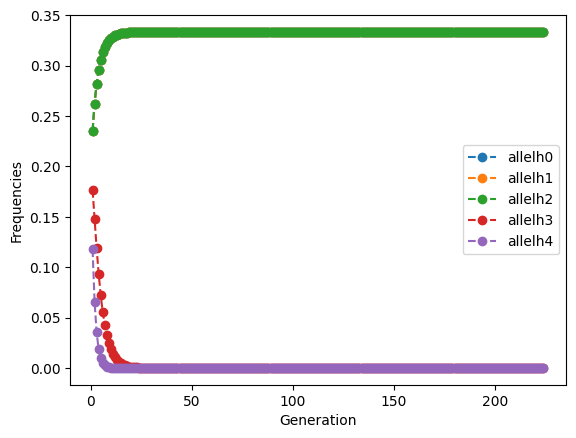

In [ ]:
print(population) #final pop
plt.plot(gen_c[1:],H_alleles_freq_over_gen[0], marker='o', linestyle='dashed',label = 'allelh0')
plt.plot(gen_c[1:],H_alleles_freq_over_gen[1], marker='o', linestyle='dashed',label = 'allelh1')
plt.plot(gen_c[1:],H_alleles_freq_over_gen[2], marker='o', linestyle='dashed',label = 'allelh2')
plt.plot(gen_c[1:],H_alleles_freq_over_gen[3], marker='o', linestyle='dashed',label = 'allelh3')
plt.plot(gen_c[1:],H_alleles_freq_over_gen[4], marker='o', linestyle='dashed',label = 'allelh4')

# naming the x axis
plt.xlabel('Generation')
# naming the y axis
plt.ylabel('Frequencies')
# giving a title to my graph
#plt.title('')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

[[9.70990572e-02 9.70990572e-02 9.70990572e-02 1.00216219e-29
  3.60160420e-69]
 [1.35441464e-01 1.35441464e-01 1.35441464e-01 1.39789528e-29
  5.02380310e-69]
 [9.78785480e-02 9.78785480e-02 9.78785480e-02 1.01020734e-29
  3.63051712e-69]
 [1.93269832e-03 1.93269832e-03 1.93269832e-03 1.99474355e-31
  7.16877651e-71]
 [9.81566128e-04 9.81566128e-04 9.81566128e-04 1.01307725e-31
  3.64083112e-71]]


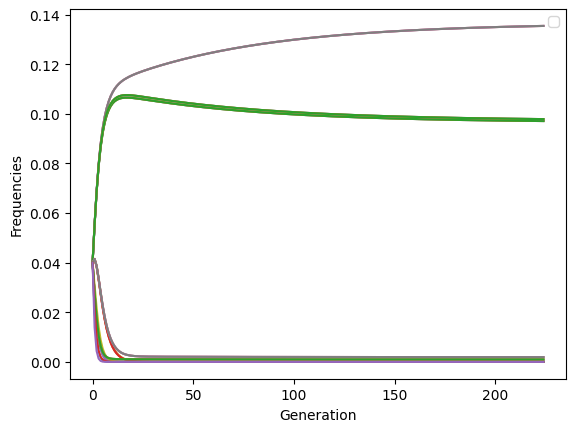

In [ ]:
print(population) #final pop
plt.plot(p_record[0][0],label = 'g0-h0')
plt.plot(p_record[0][1],label = 'g0-h1')
plt.plot(p_record[0][2],label = 'g0-h2')
plt.plot(p_record[0][3],label = 'g0-h3')
plt.plot(p_record[0][4],label = 'g0-h4')
plt.plot(p_record[1][0],label = 'g1-h0')
plt.plot(p_record[1][1],label = 'g1-h1')
plt.plot(p_record[1][2],label = 'g1-h2')
plt.plot(p_record[1][3],label = 'g1-h3')
plt.plot(p_record[1][4],label = 'g1-h4')
plt.plot(p_record[2][0],label = 'g2-h0')
plt.plot(p_record[2][1],label = 'g2-h1')
plt.plot(p_record[2][2],label = 'g2-h2')
plt.plot(p_record[2][3],label = 'g2-h3')
plt.plot(p_record[2][4],label = 'g2-h4')
plt.plot(p_record[3][0],label = 'g3-h0')
plt.plot(p_record[3][1],label = 'g3-h1')
plt.plot(p_record[3][2],label = 'g3-h2')
plt.plot(p_record[3][3],label = 'g3-h3')
plt.plot(p_record[3][4],label = 'g3-h4')
plt.plot(p_record[4][0],label = 'g4-h0')
plt.plot(p_record[4][1],label = 'g4-h1')
plt.plot(p_record[4][2],label = 'g4-h2')
plt.plot(p_record[4][3],label = 'g4-h3')
plt.plot(p_record[4][4],label = 'g4-h4')
# naming the x axis
plt.xlabel('Generation')
# naming the y axis
plt.ylabel('Frequencies')
# giving a title to my graph
#plt.title('')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

In [26]:
import random

def generate_random_array(n):
    # Generate n random numbers in the range (0, 1)
    array = [random.random() for _ in range(n)]
    # Normalize the array to make sure its elements sum to 1
    array_sum = sum(array)
    normalized_array = [x / array_sum for x in array]
    return normalized_array



In [ ]:
r=np.asarray(generate_random_array(5))

In [ ]:
r=np.asarray(r)
print(np.sum(r))

1.0


In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
  
# 1 locus, 5 alleles: 0,1,2,3,4
# allele 0,1,2 have phenotype A
# allele 3 has phenotype V (intermediate)
# allele 4 has phenotype B
def w_A(i,j, r):

    if (i<3) and (j<3):
        return (1+s)*(1+s)*r[i]
    elif (i<3) and (j==3):
        return (1+s)*(1+k_int*s)*r[i]
    elif (i<3) and (j==4):
        return (1+s)*r[i]
    elif (i==3) and (j<3):
        return (1+k_int*s)*(1+s)*r[i]
    elif (i==3) and (j==3):
        return (1+k_int*s)*(1+k_int*s)*r[i]
    elif (i==3) and (j==4):
        return (1+k_int*s)*r[i]
    elif (i==4) and (j<3):
        return (1+s)*r[i]
    elif (i==4) and (j==3):
        return (1+k_int*s)*r[i]
    elif (i==4) and (j==4):
        return 1*r[i]

def w_B(i,j,r ):
    if (i<3) and (j<3):
        return 1*r[i]
    elif (i<3) and (j==3):
        return (1+k_int*s)*r[i]
    elif (i<3) and (j==4):
        return (1+s)*r[i]
    elif (i==3) and (j<3):
        return (1+k_int*s)*r[i]
    elif (i==3) and (j==3):
        return (1+k_int*s)*(1+k_int*s)*r[i]
    elif (i==3) and (j==4):
        return (1+k_int*s)*(1+s)*r[i]
    elif (i==4) and (j<3):
        return (1+s)*r[i]
    elif (i==4) and (j==3):
        return (1+s)*(1+k_int*s)*r[i]
    elif (i==4) and (j==4):
        return (1+s)*(1+s)*r[i]

def w(i,j, is_E_A, r):
    if is_E_A:
        return w_A(i,j, r)
    else:
        return w_B(i,j, r)
#main
s = 1 # fitness advantage of A in E_A (or B in E_B)
k_int = 0.5 # 0<=k_int<=1,intermediacy of the V phenotype
mu = 0.01 # mutation rate
num_allele_per_locus = 5
#each generation, allele i can mutate to (i-1 or i+1) mod 5, each with mu/2 chance
lam = 10
# random recombination rates for 5 alleles of the major locus (assumed to be g alleles for now)
r=np.asarray(generate_random_array(5))

population = [[0.04,0.04,0.04,0.04,0.04],
              [0.04,0.04,0.04,0.04,0.04],
              [0.04,0.04,0.04,0.04,0.04],
              [0.04,0.04,0.04,0.04,0.04],
              [0.04,0.04,0.04,0.04,0.04]] # initial frequencies for the 25 genotypes

assert(len(population) == num_allele_per_locus)
gen_i = 0 # counter for generation
is_E_A = True # whether it's currently in E_A env
delta = 10 # check if there is change between gens, detect equilibrium

# lists for plots
gen_c = [0]
p_record=[[[0.04],[0.04],[0.04],[0.04],[0.04]],
          [[0.04],[0.04],[0.04],[0.04],[0.04]],
          [[0.04],[0.04],[0.04],[0.04],[0.04]],
          [[0.04],[0.04],[0.04],[0.04],[0.04]],
          [[0.04],[0.04],[0.04],[0.04],[0.04]]]

# To store the allelic freq of gi at a certain generation for plotting allelic distrbution over gen
G_alleles_freq_over_gen=[[],[],[],[],[]]
H_alleles_freq_over_gen=[[],[],[],[],[]]

while delta>0.0001:
    gen_i += 1
    
    #fluctuate between E_A and E_B every lam gen
    # alternate env if necessary
    #if (gen_i % lam == 0):
    #    is_E_A = not is_E_A
    
    delta = 0
    # calculate new freq
    new_population = np.zeros((5,5))
    avg_fit = 0
    for g in range(num_allele_per_locus):
      for h in range(num_allele_per_locus):
        avg_fit += population[g][h]*w(g,h, is_E_A,r)

    for a in range(num_allele_per_locus):
      for b in range(num_allele_per_locus):

        # updating genotype frequencies according to difference equations
        j_A = (a-1) % num_allele_per_locus
        k_A = (a+1) % num_allele_per_locus
        g_A_b = population[a][b] * w(a,b,is_E_A,r)*(1-mu) 
        g_A_b += mu*0.5*population[j_A][b] * w(j_A,b,is_E_A,r)
        g_A_b += mu*0.5*population[k_A][b] * w(k_A,b,is_E_A,r)
        g_A_b = g_A_b/avg_fit
        new_population[a][b] = g_A_b
        p_record[a][b].append(g_A_b)
        delta += abs(g_A_b-population[a][b])

    # updating the population matrix
    population = new_population
    # save gen counter
    gen_c.append(gen_i)

    
    

    # selecting a gi whose allelic frequency over gen needs to be obtained
    for gs in range(len(p_record)):
      gth_allele_freq_over_gen=[]
      for gen in range(len(p_record[0][0])):
        g_allelic_freq_1_gen=0
    # selecting which generation's gi frequency is required
        for g_hi in range(len(p_record[0])):
          # computing the allelic frequency from genotype frequency
          g_allelic_freq_1_gen+=p_record[gs][g_hi][gen]
      # saving the allelic frequency of gi at selected generation
      gth_allele_freq_over_gen.append(g_allelic_freq_1_gen)
    # saving the allelic frequency of gi for all generation
      G_alleles_freq_over_gen[gs].append(gth_allele_freq_over_gen)

    p_record2_np=np.asarray(p_record)
    # selecting a hi whose allelic frequency over gen needs to be obtained
    for hs in range(len(p_record[0])):
      hth_allele_freq_over_gen=[]
      for gen in range(len(p_record[0][0])):
        h_allelic_freq_1_gen=0
    # selecting which generation's hi frequency is required
        for h_gi in range(len(p_record)):
          # computing the allelic frequency from genotype frequency
          h_allelic_freq_1_gen+=p_record[h_gi][hs][gen]
      # saving the allelic frequency of hi at selected generation
      hth_allele_freq_over_gen.append(h_allelic_freq_1_gen)
    # saving the allelic frequency of gi for all generation
      H_alleles_freq_over_gen[hs].append(hth_allele_freq_over_gen)







[[3.25523751e-01 3.25523751e-01 3.25523751e-01 1.03347043e-04
  1.21267047e-09]
 [2.53439966e-03 2.53439966e-03 2.53439966e-03 8.04619356e-07
  9.44137445e-12]
 [1.58237232e-05 1.58237232e-05 1.58237232e-05 5.02370410e-09
  5.89479623e-14]
 [2.27453180e-05 2.27453180e-05 2.27453180e-05 7.22116700e-09
  8.47329126e-14]
 [5.20134104e-03 5.20134104e-03 5.20134104e-03 1.65131796e-06
  1.93765053e-11]]


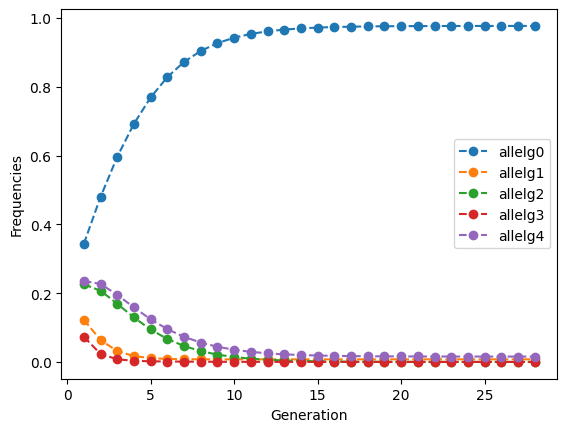

In [ ]:
print(population) #final pop
plt.plot(gen_c[1:],G_alleles_freq_over_gen[0], marker='o', linestyle='dashed',label = 'allelg0')
plt.plot(gen_c[1:],G_alleles_freq_over_gen[1], marker='o', linestyle='dashed',label = 'allelg1')
plt.plot(gen_c[1:],G_alleles_freq_over_gen[2], marker='o', linestyle='dashed',label = 'allelg2')
plt.plot(gen_c[1:],G_alleles_freq_over_gen[3], marker='o', linestyle='dashed',label = 'allelg3')
plt.plot(gen_c[1:],G_alleles_freq_over_gen[4], marker='o', linestyle='dashed',label = 'allelg4')

# naming the x axis
plt.xlabel('Generation')
# naming the y axis
plt.ylabel('Frequencies')
# giving a title to my graph
#plt.title('')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

[[3.25523751e-01 3.25523751e-01 3.25523751e-01 1.03347043e-04
  1.21267047e-09]
 [2.53439966e-03 2.53439966e-03 2.53439966e-03 8.04619356e-07
  9.44137445e-12]
 [1.58237232e-05 1.58237232e-05 1.58237232e-05 5.02370410e-09
  5.89479623e-14]
 [2.27453180e-05 2.27453180e-05 2.27453180e-05 7.22116700e-09
  8.47329126e-14]
 [5.20134104e-03 5.20134104e-03 5.20134104e-03 1.65131796e-06
  1.93765053e-11]]


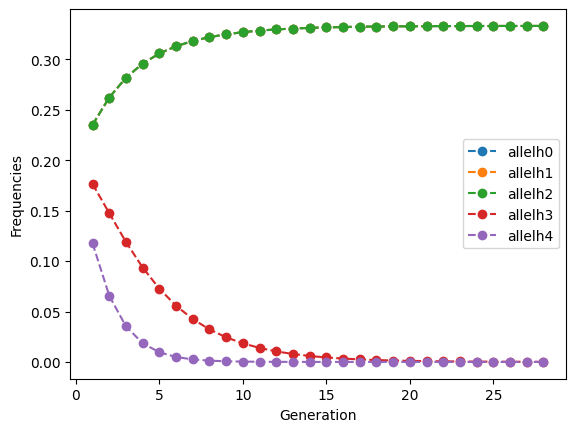

In [ ]:
print(population) #final pop
plt.plot(gen_c[1:],H_alleles_freq_over_gen[0], marker='o', linestyle='dashed',label = 'allelh0')
plt.plot(gen_c[1:],H_alleles_freq_over_gen[1], marker='o', linestyle='dashed',label = 'allelh1')
plt.plot(gen_c[1:],H_alleles_freq_over_gen[2], marker='o', linestyle='dashed',label = 'allelh2')
plt.plot(gen_c[1:],H_alleles_freq_over_gen[3], marker='o', linestyle='dashed',label = 'allelh3')
plt.plot(gen_c[1:],H_alleles_freq_over_gen[4], marker='o', linestyle='dashed',label = 'allelh4')

# naming the x axis
plt.xlabel('Generation')
# naming the y axis
plt.ylabel('Frequencies')
# giving a title to my graph
#plt.title('')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

[[3.25523751e-01 3.25523751e-01 3.25523751e-01 1.03347043e-04
  1.21267047e-09]
 [2.53439966e-03 2.53439966e-03 2.53439966e-03 8.04619356e-07
  9.44137445e-12]
 [1.58237232e-05 1.58237232e-05 1.58237232e-05 5.02370410e-09
  5.89479623e-14]
 [2.27453180e-05 2.27453180e-05 2.27453180e-05 7.22116700e-09
  8.47329126e-14]
 [5.20134104e-03 5.20134104e-03 5.20134104e-03 1.65131796e-06
  1.93765053e-11]]


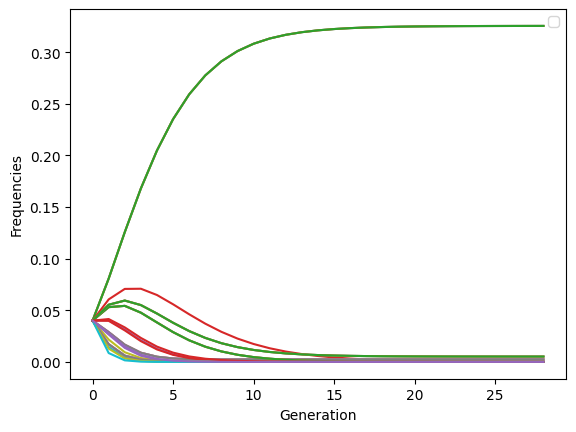

In [ ]:
print(population) #final pop
plt.plot(p_record[0][0])
plt.plot(p_record[0][1])
plt.plot(p_record[0][2])
plt.plot(p_record[0][3])
plt.plot(p_record[0][4])
plt.plot(p_record[1][0])
plt.plot(p_record[1][1])
plt.plot(p_record[1][2])
plt.plot(p_record[1][3])
plt.plot(p_record[1][4])
plt.plot(p_record[2][0])
plt.plot(p_record[2][1])
plt.plot(p_record[2][2])
plt.plot(p_record[2][3])
plt.plot(p_record[2][4])
plt.plot(p_record[3][0])
plt.plot(p_record[3][1])
plt.plot(p_record[3][2])
plt.plot(p_record[3][3])
plt.plot(p_record[3][4])
plt.plot(p_record[4][0])
plt.plot(p_record[4][1])
plt.plot(p_record[4][2])
plt.plot(p_record[4][3])
plt.plot(p_record[4][4])
# naming the x axis
plt.xlabel('Generation')
# naming the y axis
plt.ylabel('Frequencies')
# giving a title to my graph
#plt.title('')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

In [20]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
  
# 1 locus, 5 alleles: 0,1,2,3,4
# allele 0,1,2 have phenotype A
# allele 3 has phenotype V (intermediate)
# allele 4 has phenotype B
def w_A(i,j):

    if (i<3) and (j<3):
        return (1+s)*(1+s)
    elif (i<3) and (j==3):
        return (1+s)*(1+k_int*s)
    elif (i<3) and (j==4):
        return (1+s)
    elif (i==3) and (j<3):
        return (1+k_int*s)*(1+s)
    elif (i==3) and (j==3):
        return (1+k_int*s)*(1+k_int*s)
    elif (i==3) and (j==4):
        return (1+k_int*s)
    elif (i==4) and (j<3):
        return (1+s)
    elif (i==4) and (j==3):
        return (1+k_int*s)
    elif (i==4) and (j==4):
        return 1

def w_B(i,j ):
    if (i<3) and (j<3):
        return 1
    elif (i<3) and (j==3):
        return (1+k_int*s)
    elif (i<3) and (j==4):
        return (1+s)
    elif (i==3) and (j<3):
        return (1+k_int*s)
    elif (i==3) and (j==3):
        return (1+k_int*s)*(1+k_int*s)
    elif (i==3) and (j==4):
        return (1+k_int*s)*(1+s)
    elif (i==4) and (j<3):
        return (1+s)
    elif (i==4) and (j==3):
        return (1+s)*(1+k_int*s)
    elif (i==4) and (j==4):
        return (1+s)*(1+s)

def w(i,j, is_E_A):
    if is_E_A:
        return w_A(i,j)
    else:
        return w_B(i,j)
#main
s = 1 # fitness advantage of A in E_A (or B in E_B)
k_int = 0.5 # 0<=k_int<=1,intermediacy of the V phenotype
mu = 0.01 # mutation rate
mu_rates = [0.0005, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.3]
num_allele_per_locus = 5
#each generation, allele i can mutate to (i-1 or i+1) mod 5, each with mu/2 chance

lambdas = [4, 10, 20, 30, 70, 100, 300, 700, 1000, 3000, 7000, 10000]
#lam = 4

avg_record_A=[[[],[],[],[],[]],
              [[],[],[],[],[]],
              [[],[],[],[],[]],
              [[],[],[],[],[]],
              [[],[],[],[],[]]]
avg_record_B=[[[],[],[],[],[]],
              [[],[],[],[],[]],
              [[],[],[],[],[]],
              [[],[],[],[],[]],
              [[],[],[],[],[]]]

G_alleles_freq_over_lambda_envA=[[],[],[],[],[]]
G_alleles_freq_over_lambda_envB=[[],[],[],[],[]]
H_alleles_freq_over_lambda_envA=[[],[],[],[],[]]
H_alleles_freq_over_lambda_envB=[[],[],[],[],[]]
for lam in lambdas:
    population=[[0.04,0.04,0.04,0.04,0.04],
              [0.04,0.04,0.04,0.04,0.04],
              [0.04,0.04,0.04,0.04,0.04],
              [0.04,0.04,0.04,0.04,0.04],
              [0.04,0.04,0.04,0.04,0.04]] # initial frequencies for the 5 allele
    
    assert(len(population) == num_allele_per_locus)
    gen_i = 1 # counter for generation
    is_E_A = True # whether it's currently in E_A env
    # lists for plots
    p_record=[[[0.04],[0.04],[0.04],[0.04],[0.04]],
          [[0.04],[0.04],[0.04],[0.04],[0.04]],
          [[0.04],[0.04],[0.04],[0.04],[0.04]],
          [[0.04],[0.04],[0.04],[0.04],[0.04]],
          [[0.04],[0.04],[0.04],[0.04],[0.04]]]
    
    sum_record_A = [[0,0,0,0,0],
                    [0,0,0,0,0],
                    [0,0,0,0,0],
                    [0,0,0,0,0],
                    [0,0,0,0,0]]
    sum_record_B = [[0,0,0,0,0],
                    [0,0,0,0,0],
                    [0,0,0,0,0],
                    [0,0,0,0,0],
                    [0,0,0,0,0]]
    total_gen = 100*lam

    while gen_i < total_gen:
        gen_i += 1
        
        delta = 0
        # calculate new freq
        new_population = np.zeros((5,5))
        avg_fit = 0
        for g in range(num_allele_per_locus):
          for h in range(num_allele_per_locus):
              avg_fit += population[g][h]*w(g,h, is_E_A)
    
        for a in range(num_allele_per_locus):
          for b in range(num_allele_per_locus):

            # updating genotype frequencies according to difference equations
            j_A = (a-1) % num_allele_per_locus
            k_A = (a+1) % num_allele_per_locus
            g_A_b = population[a][b] * w(a,b,is_E_A)*(1-mu) 
            g_A_b += mu*0.5*population[j_A][b] * w(j_A,b,is_E_A)
            g_A_b += mu*0.5*population[k_A][b] * w(k_A,b,is_E_A)
            g_A_b = g_A_b/avg_fit
            new_population[a][b] = g_A_b
            p_record[a][b].append(g_A_b)
            delta += abs(g_A_b-population[a][b])
            if is_E_A:
                sum_record_A[a][b] += g_A_b
            else:
                sum_record_B[a][b] += g_A_b
    
        population = new_population
    
        #fluctuate between E_A and E_B every lam gen
        # alternate env if necessary
        if (gen_i % lam == 0):
            is_E_A = not is_E_A
    
    # if (sum_record_A[3]> sum_record_A[4]):
    #     print(mu, lam)
    for a in range(num_allele_per_locus):
        for b in range(num_allele_per_locus):
          avg_record_A[a][b].append(sum_record_A[a][b]/total_gen*2)
          avg_record_B[a][b].append(sum_record_B[a][b]/total_gen*2)
    
    # selecting a gi whose allelic frequency over lamba needs to be obtained
    for gs in range(len(avg_record_A)):
      gth_allele_freq_over_lambda=[]
      for lamda in range(len(avg_record_A[0][0])):
        g_allelic_freq_1_lambda=0
    # selecting which lambda's gi frequency is required
        for g_hi in range(len(avg_record_A[0])):
          # computing the allelic frequency from genotype frequency
          g_allelic_freq_1_lambda+=avg_record_A[gs][g_hi][lamda]
      # saving the allelic frequency of gi at selected lambda
      gth_allele_freq_over_lambda.append(g_allelic_freq_1_lambda)
    # saving the allelic frequency of gi for all lambdas
      G_alleles_freq_over_lambda_envA[gs].append(gth_allele_freq_over_lambda)

    # selecting a gi whose allelic frequency over lamba needs to be obtained
    for gs in range(len(avg_record_B)):
      gth_allele_freq_over_lambda=[]
      for lamda in range(len(avg_record_B[0][0])):
        g_allelic_freq_1_lambda=0
    # selecting which lambda's gi frequency is required
        for g_hi in range(len(avg_record_B[0])):
          # computing the allelic frequency from genotype frequency
          g_allelic_freq_1_lambda+=avg_record_B[gs][g_hi][lamda]
      # saving the allelic frequency of gi at selected lambda
      gth_allele_freq_over_lambda.append(g_allelic_freq_1_lambda)
    # saving the allelic frequency of gi for all lambdas
      G_alleles_freq_over_lambda_envB[gs].append(gth_allele_freq_over_lambda)    

    # selecting a hi whose allelic frequency over gen needs to be obtained
    for hs in range(len(avg_record_A[0])):
      hth_allele_freq_over_lambda=[]
      for lamda in range(len(avg_record_A[0][0])):
        h_allelic_freq_1_lambda=0
    # selecting which generation's hi frequency is required
        for h_gi in range(len(avg_record_A)):
          # computing the allelic frequency from genotype frequency
          h_allelic_freq_1_lambda+=avg_record_A[h_gi][hs][lamda]
      # saving the allelic frequency of hi at selected generation
      hth_allele_freq_over_lambda.append(h_allelic_freq_1_lambda)
    # saving the allelic frequency of gi for all generation
      H_alleles_freq_over_lambda_envA[hs].append(hth_allele_freq_over_lambda)

      # selecting a hi whose allelic frequency over gen needs to be obtained
    for hs in range(len(avg_record_B[0])):
      hth_allele_freq_over_lambda=[]
      for lamda in range(len(avg_record_B[0][0])):
        h_allelic_freq_1_lambda=0
    # selecting which generation's hi frequency is required
        for h_gi in range(len(avg_record_B)):
          # computing the allelic frequency from genotype frequency
          h_allelic_freq_1_lambda+=avg_record_B[h_gi][hs][lamda]
      # saving the allelic frequency of hi at selected generation
      hth_allele_freq_over_lambda.append(h_allelic_freq_1_lambda)
    # saving the allelic frequency of gi for all generation
      H_alleles_freq_over_lambda_envB[hs].append(hth_allele_freq_over_lambda)


[[0.00000000e+000 0.00000000e+000 0.00000000e+000 4.94065646e-324
  9.80030653e-003]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 4.94065646e-324
  5.02372095e-005]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 4.94065646e-324
  1.48690134e-004]
 [4.94065646e-324 4.94065646e-324 4.94065646e-324 4.94065646e-324
  1.95976102e-002]
 [4.94065646e-324 4.94065646e-324 4.94065646e-324 9.88131292e-324
  9.70403156e-001]]


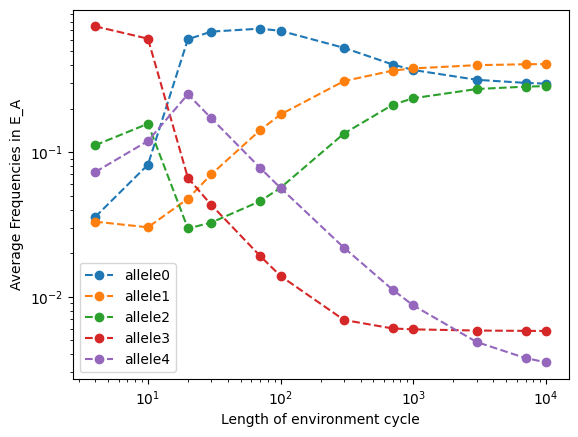

In [21]:
print(population) #final pop
plt.figure("Environment A")
plt.plot(lambdas,G_alleles_freq_over_lambda_envA[0], marker='o', linestyle='dashed',label = 'allele0')
plt.plot(lambdas,G_alleles_freq_over_lambda_envA[1], marker='o', linestyle='dashed',label = 'allele1')
plt.plot(lambdas,G_alleles_freq_over_lambda_envA[2], marker='o', linestyle='dashed',label = 'allele2')
plt.plot(lambdas,G_alleles_freq_over_lambda_envA[3], marker='o', linestyle='dashed',label = 'allele3')
plt.plot(lambdas,G_alleles_freq_over_lambda_envA[4], marker='o', linestyle='dashed',label = 'allele4')
# naming the x axis
plt.xlabel('Length of environment cycle')
# naming the y axis
plt.ylabel('Average Frequencies in E_A')
plt.xscale("log")
plt.yscale("log")
# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

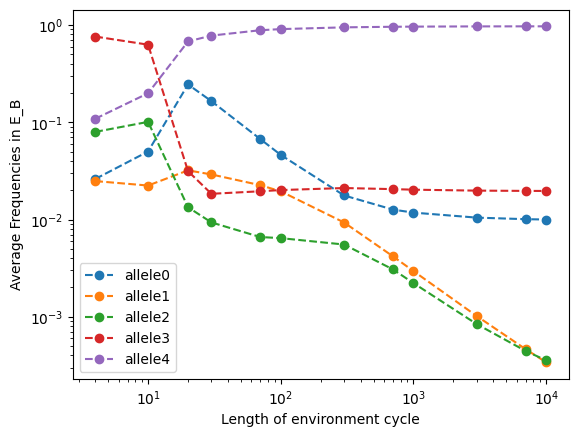

In [22]:
plt.figure("Environment B")
plt.plot(lambdas,G_alleles_freq_over_lambda_envB[0], marker='o', linestyle='dashed',label = 'allele0')
plt.plot(lambdas,G_alleles_freq_over_lambda_envB[1], marker='o', linestyle='dashed',label = 'allele1')
plt.plot(lambdas,G_alleles_freq_over_lambda_envB[2], marker='o', linestyle='dashed',label = 'allele2')
plt.plot(lambdas,G_alleles_freq_over_lambda_envB[3], marker='o', linestyle='dashed',label = 'allele3')
plt.plot(lambdas,G_alleles_freq_over_lambda_envB[4], marker='o', linestyle='dashed',label = 'allele4')
# naming the x axis
plt.xlabel('Length of environment cycle')
# naming the y axis
plt.ylabel('Average Frequencies in E_B')
plt.xscale("log")
plt.yscale("log")
# show a legend on the plot
plt.legend()

[[0.00000000e+000 0.00000000e+000 0.00000000e+000 4.94065646e-324
  9.80030653e-003]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 4.94065646e-324
  5.02372095e-005]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 4.94065646e-324
  1.48690134e-004]
 [4.94065646e-324 4.94065646e-324 4.94065646e-324 4.94065646e-324
  1.95976102e-002]
 [4.94065646e-324 4.94065646e-324 4.94065646e-324 9.88131292e-324
  9.70403156e-001]]


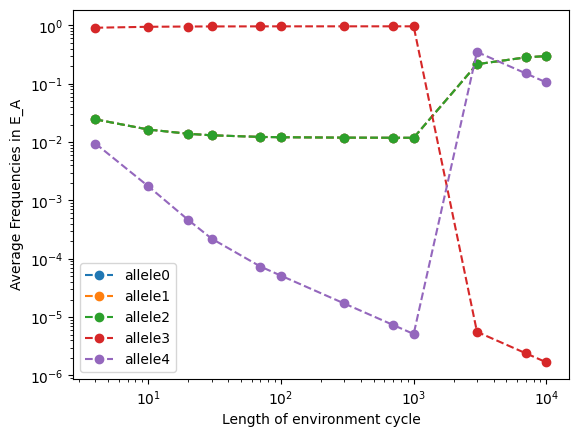

In [23]:
print(population) #final pop
plt.figure("Environment A")
plt.plot(lambdas,H_alleles_freq_over_lambda_envA[0], marker='o', linestyle='dashed',label = 'allele0')
plt.plot(lambdas,H_alleles_freq_over_lambda_envA[1], marker='o', linestyle='dashed',label = 'allele1')
plt.plot(lambdas,H_alleles_freq_over_lambda_envA[2], marker='o', linestyle='dashed',label = 'allele2')
plt.plot(lambdas,H_alleles_freq_over_lambda_envA[3], marker='o', linestyle='dashed',label = 'allele3')
plt.plot(lambdas,H_alleles_freq_over_lambda_envA[4], marker='o', linestyle='dashed',label = 'allele4')
# naming the x axis
plt.xlabel('Length of environment cycle')
# naming the y axis
plt.ylabel('Average Frequencies in E_A')
plt.xscale("log")
plt.yscale("log")
# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

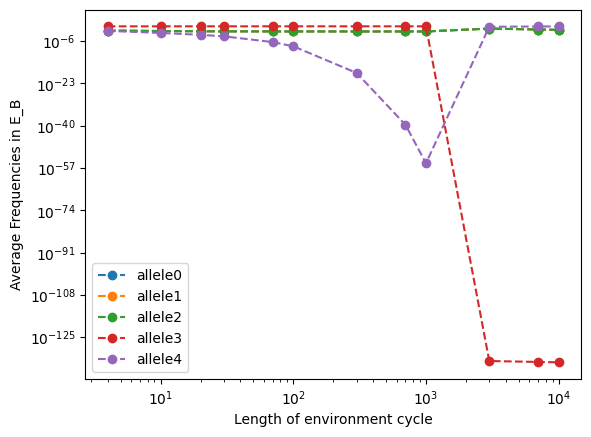

In [24]:
plt.figure("Environment B")
plt.plot(lambdas,H_alleles_freq_over_lambda_envB[0], marker='o', linestyle='dashed',label = 'allele0')
plt.plot(lambdas,H_alleles_freq_over_lambda_envB[1], marker='o', linestyle='dashed',label = 'allele1')
plt.plot(lambdas,H_alleles_freq_over_lambda_envB[2], marker='o', linestyle='dashed',label = 'allele2')
plt.plot(lambdas,H_alleles_freq_over_lambda_envB[3], marker='o', linestyle='dashed',label = 'allele3')
plt.plot(lambdas,H_alleles_freq_over_lambda_envB[4], marker='o', linestyle='dashed',label = 'allele4')
# naming the x axis
plt.xlabel('Length of environment cycle')
# naming the y axis
plt.ylabel('Average Frequencies in E_B')
plt.xscale("log")
plt.yscale("log")
# show a legend on the plot
plt.legend()

In [28]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
  
# 1 locus, 5 alleles: 0,1,2,3,4
# allele 0,1,2 have phenotype A
# allele 3 has phenotype V (intermediate)
# allele 4 has phenotype B
def w_A(i,j, r):

    if (i<3) and (j<3):
        return (1+s)*(1+s)*r[i]
    elif (i<3) and (j==3):
        return (1+s)*(1+k_int*s)*r[i]
    elif (i<3) and (j==4):
        return (1+s)*r[i]
    elif (i==3) and (j<3):
        return (1+k_int*s)*(1+s)*r[i]
    elif (i==3) and (j==3):
        return (1+k_int*s)*(1+k_int*s)*r[i]
    elif (i==3) and (j==4):
        return (1+k_int*s)*r[i]
    elif (i==4) and (j<3):
        return (1+s)*r[i]
    elif (i==4) and (j==3):
        return (1+k_int*s)*r[i]
    elif (i==4) and (j==4):
        return 1*r[i]

def w_B(i,j,r ):
    if (i<3) and (j<3):
        return 1*r[i]
    elif (i<3) and (j==3):
        return (1+k_int*s)*r[i]
    elif (i<3) and (j==4):
        return (1+s)*r[i]
    elif (i==3) and (j<3):
        return (1+k_int*s)*r[i]
    elif (i==3) and (j==3):
        return (1+k_int*s)*(1+k_int*s)*r[i]
    elif (i==3) and (j==4):
        return (1+k_int*s)*(1+s)*r[i]
    elif (i==4) and (j<3):
        return (1+s)*r[i]
    elif (i==4) and (j==3):
        return (1+s)*(1+k_int*s)*r[i]
    elif (i==4) and (j==4):
        return (1+s)*(1+s)*r[i]

def w(i,j, is_E_A, r):
    if is_E_A:
        return w_A(i,j, r)
    else:
        return w_B(i,j, r)
#main
s = 1 # fitness advantage of A in E_A (or B in E_B)
k_int = 0.5 # 0<=k_int<=1,intermediacy of the V phenotype
mu = 0.01 # mutation rate
mu_rates = [0.0005, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.3]
num_allele_per_locus = 5
#each generation, allele i can mutate to (i-1 or i+1) mod 5, each with mu/2 chance

lambdas = [4, 10, 20, 30, 70, 100, 300, 700, 1000, 3000, 7000, 10000]
# recombination paramters
r=np.asarray(generate_random_array(5))

avg_record_A=[[[],[],[],[],[]],
              [[],[],[],[],[]],
              [[],[],[],[],[]],
              [[],[],[],[],[]],
              [[],[],[],[],[]]]
avg_record_B=[[[],[],[],[],[]],
              [[],[],[],[],[]],
              [[],[],[],[],[]],
              [[],[],[],[],[]],
              [[],[],[],[],[]]]

G_alleles_freq_over_lambda_envA=[[],[],[],[],[]]
G_alleles_freq_over_lambda_envB=[[],[],[],[],[]]
H_alleles_freq_over_lambda_envA=[[],[],[],[],[]]
H_alleles_freq_over_lambda_envB=[[],[],[],[],[]]
for lam in lambdas:
    population=[[0.04,0.04,0.04,0.04,0.04],
              [0.04,0.04,0.04,0.04,0.04],
              [0.04,0.04,0.04,0.04,0.04],
              [0.04,0.04,0.04,0.04,0.04],
              [0.04,0.04,0.04,0.04,0.04]] # initial frequencies for the 5 allele
    
    assert(len(population) == num_allele_per_locus)
    gen_i = 1 # counter for generation
    is_E_A = True # whether it's currently in E_A env
    # lists for plots
    p_record=[[[0.04],[0.04],[0.04],[0.04],[0.04]],
          [[0.04],[0.04],[0.04],[0.04],[0.04]],
          [[0.04],[0.04],[0.04],[0.04],[0.04]],
          [[0.04],[0.04],[0.04],[0.04],[0.04]],
          [[0.04],[0.04],[0.04],[0.04],[0.04]]]
    
    sum_record_A = [[0,0,0,0,0],
                    [0,0,0,0,0],
                    [0,0,0,0,0],
                    [0,0,0,0,0],
                    [0,0,0,0,0]]
    sum_record_B = [[0,0,0,0,0],
                    [0,0,0,0,0],
                    [0,0,0,0,0],
                    [0,0,0,0,0],
                    [0,0,0,0,0]]
    total_gen = 100*lam

    while gen_i < total_gen:
        gen_i += 1
        
        delta = 0
        # calculate new freq
        new_population = np.zeros((5,5))
        avg_fit = 0
        for g in range(num_allele_per_locus):
          for h in range(num_allele_per_locus):
              avg_fit += population[g][h]*w(g,h, is_E_A,r)
    
        for a in range(num_allele_per_locus):
          for b in range(num_allele_per_locus):

            # updating genotype frequencies according to difference equations
            j_A = (a-1) % num_allele_per_locus
            k_A = (a+1) % num_allele_per_locus
            g_A_b = population[a][b] * w(a,b,is_E_A,r)*(1-mu) 
            g_A_b += mu*0.5*population[j_A][b] * w(j_A,b,is_E_A,r)
            g_A_b += mu*0.5*population[k_A][b] * w(k_A,b,is_E_A,r)
            g_A_b = g_A_b/avg_fit
            new_population[a][b] = g_A_b
            p_record[a][b].append(g_A_b)
            delta += abs(g_A_b-population[a][b])
            if is_E_A:
                sum_record_A[a][b] += g_A_b
            else:
                sum_record_B[a][b] += g_A_b
    
        population = new_population
    
        #fluctuate between E_A and E_B every lam gen
        # alternate env if necessary
        if (gen_i % lam == 0):
            is_E_A = not is_E_A
    
    # if (sum_record_A[3]> sum_record_A[4]):
    #     print(mu, lam)
    for a in range(num_allele_per_locus):
        for b in range(num_allele_per_locus):
          avg_record_A[a][b].append(sum_record_A[a][b]/total_gen*2)
          avg_record_B[a][b].append(sum_record_B[a][b]/total_gen*2)
    
    # selecting a gi whose allelic frequency over lamba needs to be obtained
    for gs in range(len(avg_record_A)):
      gth_allele_freq_over_lambda=[]
      for lamda in range(len(avg_record_A[0][0])):
        g_allelic_freq_1_lambda=0
    # selecting which lambda's gi frequency is required
        for g_hi in range(len(avg_record_A[0])):
          # computing the allelic frequency from genotype frequency
          g_allelic_freq_1_lambda+=avg_record_A[gs][g_hi][lamda]
      # saving the allelic frequency of gi at selected lambda
      gth_allele_freq_over_lambda.append(g_allelic_freq_1_lambda)
    # saving the allelic frequency of gi for all lambdas
      G_alleles_freq_over_lambda_envA[gs].append(gth_allele_freq_over_lambda)

    # selecting a gi whose allelic frequency over lamba needs to be obtained
    for gs in range(len(avg_record_B)):
      gth_allele_freq_over_lambda=[]
      for lamda in range(len(avg_record_B[0][0])):
        g_allelic_freq_1_lambda=0
    # selecting which lambda's gi frequency is required
        for g_hi in range(len(avg_record_B[0])):
          # computing the allelic frequency from genotype frequency
          g_allelic_freq_1_lambda+=avg_record_B[gs][g_hi][lamda]
      # saving the allelic frequency of gi at selected lambda
      gth_allele_freq_over_lambda.append(g_allelic_freq_1_lambda)
    # saving the allelic frequency of gi for all lambdas
      G_alleles_freq_over_lambda_envB[gs].append(gth_allele_freq_over_lambda)    

    # selecting a hi whose allelic frequency over gen needs to be obtained
    for hs in range(len(avg_record_A[0])):
      hth_allele_freq_over_lambda=[]
      for lamda in range(len(avg_record_A[0][0])):
        h_allelic_freq_1_lambda=0
    # selecting which generation's hi frequency is required
        for h_gi in range(len(avg_record_A)):
          # computing the allelic frequency from genotype frequency
          h_allelic_freq_1_lambda+=avg_record_A[h_gi][hs][lamda]
      # saving the allelic frequency of hi at selected generation
      hth_allele_freq_over_lambda.append(h_allelic_freq_1_lambda)
    # saving the allelic frequency of gi for all generation
      H_alleles_freq_over_lambda_envA[hs].append(hth_allele_freq_over_lambda)

      # selecting a hi whose allelic frequency over gen needs to be obtained
    for hs in range(len(avg_record_B[0])):
      hth_allele_freq_over_lambda=[]
      for lamda in range(len(avg_record_B[0][0])):
        h_allelic_freq_1_lambda=0
    # selecting which generation's hi frequency is required
        for h_gi in range(len(avg_record_B)):
          # computing the allelic frequency from genotype frequency
          h_allelic_freq_1_lambda+=avg_record_B[h_gi][hs][lamda]
      # saving the allelic frequency of hi at selected generation
      hth_allele_freq_over_lambda.append(h_allelic_freq_1_lambda)
    # saving the allelic frequency of gi for all generation
      H_alleles_freq_over_lambda_envB[hs].append(hth_allele_freq_over_lambda)


[[0.00000000e+000 0.00000000e+000 0.00000000e+000 8.52166936e-005
  0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 1.39140619e-002
  9.88131292e-324]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 2.38021221e-002
  9.88131292e-324]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 9.56530340e-001
  0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 5.66825913e-003
  0.00000000e+000]]


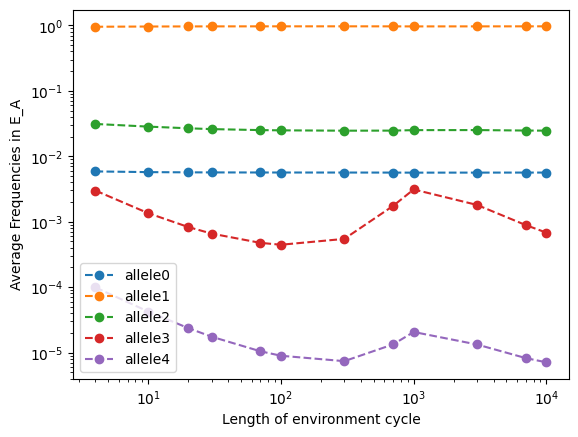

In [29]:
print(population) #final pop
plt.figure("Environment A")
plt.plot(lambdas,G_alleles_freq_over_lambda_envA[0], marker='o', linestyle='dashed',label = 'allele0')
plt.plot(lambdas,G_alleles_freq_over_lambda_envA[1], marker='o', linestyle='dashed',label = 'allele1')
plt.plot(lambdas,G_alleles_freq_over_lambda_envA[2], marker='o', linestyle='dashed',label = 'allele2')
plt.plot(lambdas,G_alleles_freq_over_lambda_envA[3], marker='o', linestyle='dashed',label = 'allele3')
plt.plot(lambdas,G_alleles_freq_over_lambda_envA[4], marker='o', linestyle='dashed',label = 'allele4')
# naming the x axis
plt.xlabel('Length of environment cycle')
# naming the y axis
plt.ylabel('Average Frequencies in E_A')
plt.xscale("log")
plt.yscale("log")
# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

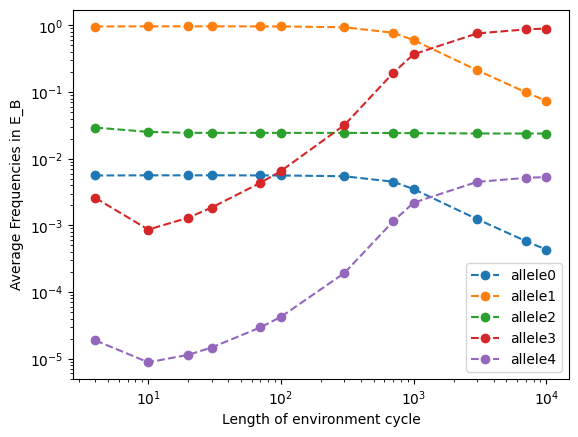

In [30]:
plt.figure("Environment B")
plt.plot(lambdas,G_alleles_freq_over_lambda_envB[0], marker='o', linestyle='dashed',label = 'allele0')
plt.plot(lambdas,G_alleles_freq_over_lambda_envB[1], marker='o', linestyle='dashed',label = 'allele1')
plt.plot(lambdas,G_alleles_freq_over_lambda_envB[2], marker='o', linestyle='dashed',label = 'allele2')
plt.plot(lambdas,G_alleles_freq_over_lambda_envB[3], marker='o', linestyle='dashed',label = 'allele3')
plt.plot(lambdas,G_alleles_freq_over_lambda_envB[4], marker='o', linestyle='dashed',label = 'allele4')
# naming the x axis
plt.xlabel('Length of environment cycle')
# naming the y axis
plt.ylabel('Average Frequencies in E_B')
plt.xscale("log")
plt.yscale("log")
# show a legend on the plot
plt.legend()

[[0.00000000e+000 0.00000000e+000 0.00000000e+000 8.52166936e-005
  0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 1.39140619e-002
  9.88131292e-324]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 2.38021221e-002
  9.88131292e-324]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 9.56530340e-001
  0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 5.66825913e-003
  0.00000000e+000]]


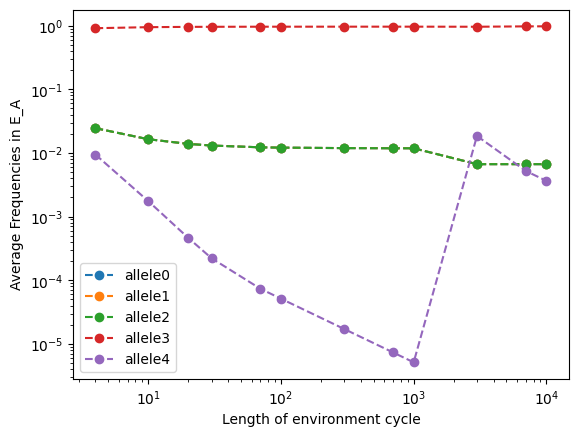

In [31]:
print(population) #final pop
plt.figure("Environment A")
plt.plot(lambdas,H_alleles_freq_over_lambda_envA[0], marker='o', linestyle='dashed',label = 'allele0')
plt.plot(lambdas,H_alleles_freq_over_lambda_envA[1], marker='o', linestyle='dashed',label = 'allele1')
plt.plot(lambdas,H_alleles_freq_over_lambda_envA[2], marker='o', linestyle='dashed',label = 'allele2')
plt.plot(lambdas,H_alleles_freq_over_lambda_envA[3], marker='o', linestyle='dashed',label = 'allele3')
plt.plot(lambdas,H_alleles_freq_over_lambda_envA[4], marker='o', linestyle='dashed',label = 'allele4')
# naming the x axis
plt.xlabel('Length of environment cycle')
# naming the y axis
plt.ylabel('Average Frequencies in E_A')
plt.xscale("log")
plt.yscale("log")
# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

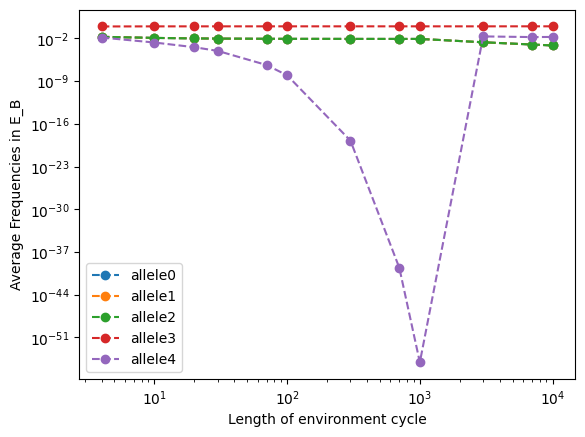

In [32]:
plt.figure("Environment B")
plt.plot(lambdas,H_alleles_freq_over_lambda_envB[0], marker='o', linestyle='dashed',label = 'allele0')
plt.plot(lambdas,H_alleles_freq_over_lambda_envB[1], marker='o', linestyle='dashed',label = 'allele1')
plt.plot(lambdas,H_alleles_freq_over_lambda_envB[2], marker='o', linestyle='dashed',label = 'allele2')
plt.plot(lambdas,H_alleles_freq_over_lambda_envB[3], marker='o', linestyle='dashed',label = 'allele3')
plt.plot(lambdas,H_alleles_freq_over_lambda_envB[4], marker='o', linestyle='dashed',label = 'allele4')
# naming the x axis
plt.xlabel('Length of environment cycle')
# naming the y axis
plt.ylabel('Average Frequencies in E_B')
plt.xscale("log")
plt.yscale("log")
# show a legend on the plot
plt.legend()

In [33]:
print("recombination paramter values:",r)

recombination paramter values: [0.049404   0.37348157 0.29864145 0.25068271 0.02779028]
